In [2]:
!pip install -q kaggle
import pandas as pd

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohansawant01","key":"0a5e444cf41a4740f864624141f38ada"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
 !chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!cp kaggle.json ~/.kaggle/

In [9]:
!unzip /content/earthquake_dataset.csv.zip

Archive:  /content/earthquake_dataset.csv.zip
  inflating: earthquake_dataset.csv  


In [10]:
df=pd.read_csv('/content/earthquake_dataset.csv.zip')

In [49]:
da = df[df["Type"]=="Earthquake"]

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

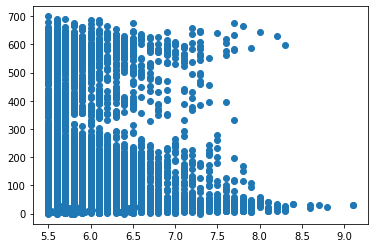

In [35]:
plt.scatter(x=da["Magnitude"],y=da["Depth"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


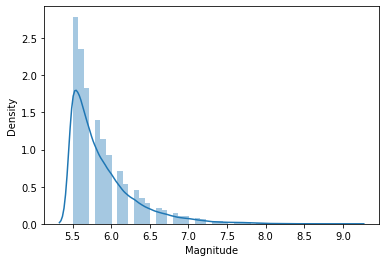

In [36]:
sns.distplot(da["Magnitude"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


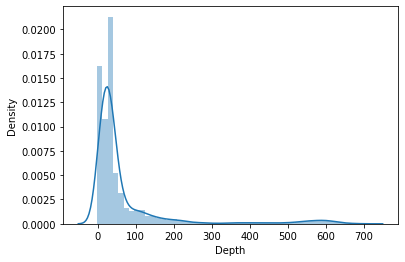

In [37]:
sns.distplot(da["Depth"])
plt.show()

In [67]:
da1 = da.iloc[:,5:7]
da2 = pd.get_dummies(da["Magnitude Type"])
data = pd.concat([da1, da2], axis=1, join="inner")

In [17]:
from sklearn.linear_model import LinearRegression

In [71]:
train_data = data.iloc[:23000,]
test_data = data.iloc[23001:,]

In [72]:
train_data.head()

,Depth,Magnitude,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
0,131.6,6.0,0,0,0,0,0,1,0,0,0,0
1,80.0,5.8,0,0,0,0,0,1,0,0,0,0
2,20.0,6.2,0,0,0,0,0,1,0,0,0,0
3,15.0,5.8,0,0,0,0,0,1,0,0,0,0
4,15.0,5.8,0,0,0,0,0,1,0,0,0,0


In [78]:
model = LinearRegression()
model.fit(train_data.iloc[:,1:],train_data["Depth"])
print(model.intercept_,model.coef_)

-51.11173166442167 [ 10.7146726   75.93663234   8.85085179 -10.88762717   2.01534036
  17.02635694  64.57297423  65.29065786  55.20108388   9.80155424
  53.01616784]


In [81]:
model.predict(test_data.iloc[:,1:])

array([60.83513551, 83.75560001, 10.90577529, 65.12100455, 75.25256004,
       64.04953729, 83.75560001, 67.26393907, 70.47834085, 77.39549456,
       64.04953729, 65.12100455, 84.40741524, 84.82706727, 61.90660277,
       65.12100455, 61.90660277, 61.90660277, 61.90660277, 68.33540633,
       69.40687359, 60.83513551, 79.05007893, 67.26393907, 83.75560001,
       62.97807003, 61.90660277, 73.10962552, 61.90660277, 62.97807003,
       66.19247181, 63.02005154, 81.19301345, 85.89853453, 64.04953729,
       73.10962552, 60.83513551, 66.19247181, 64.04953729, 67.26393907,
       61.90660277, 66.19247181, 86.97000179, 68.33540633, 61.90660277,
       74.76420989, 61.90660277, 65.12100455, 60.83513551, 77.97861167,
       74.76420989, 64.04953729, 76.90714441, 83.75560001, 83.75560001,
       85.89853453, 67.26393907, 60.83513551, 83.75560001, 60.83513551,
       83.75560001, 73.10962552, 73.10962552, 73.89199606, 64.04953729,
       83.75560001, 64.04953729, 65.12100455, 67.26393907, 61.90

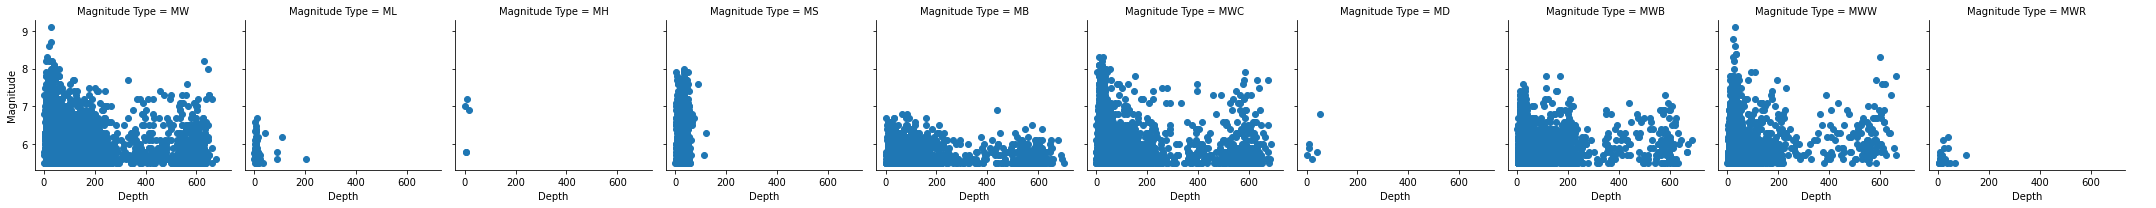

In [84]:
sns.FacetGrid(da, col="Magnitude Type").map(plt.scatter, "Depth", "Magnitude").add_legend() 